In [2]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
import random


In [2]:
file_path = "datasets/US_Accidents_March23.csv"
df = pd.read_csv(file_path)

print(f"Total rows: {df.shape[0]}")

Total rows: 7728394


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [16]:
bin_edges = np.arange(df['Temperature(F)'].min(), df['Temperature(F)'].max() + 5, 5)

# Categorize the data into bins
df['Temp_Range'] = pd.cut(df['Temperature(F)'], bins=bin_edges)

# Count occurrences in each bin
temp_range_counts = df['Temp_Range'].value_counts()

# Sort by most common and get the top 10
top_10_temp_ranges = temp_range_counts.head(20)
print(top_10_temp_ranges)

Temp_Range
(71.0, 76.0]      855377
(76.0, 81.0]      731953
(61.0, 66.0]      720492
(66.0, 71.0]      703493
(56.0, 61.0]      683742
(51.0, 56.0]      649753
(81.0, 86.0]      548573
(46.0, 51.0]      487750
(41.0, 46.0]      428629
(86.0, 91.0]      347861
(36.0, 41.0]      344145
(31.0, 36.0]      312009
(26.0, 31.0]      238587
(91.0, 96.0]      137909
(21.0, 26.0]      116986
(16.0, 21.0]       75971
(96.0, 101.0]      50466
(11.0, 16.0]       41868
(6.0, 11.0]        28015
(101.0, 106.0]     15332
Name: count, dtype: int64


In [13]:
df['Weather_Condition'].value_counts().head(20)

Weather_Condition
Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Name: count, dtype: int64

In [9]:
heavy_rain = df[df['Weather_Condition'] == 'Heavy Rain']

# Count occurrences by state
state_counts = heavy_rain['State'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)
print(top_10_states)

State
CA    6073
FL    4681
SC    2674
TX    2053
VA    1871
NC    1792
NY    1388
PA    1248
GA    1099
TN     953
Name: count, dtype: int64


In [11]:
heavy_rain = df[df['Weather_Condition'] == 'Light Snow']

# Count occurrences by state
state_counts = heavy_rain['State'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)
print(top_10_states)

State
MN    21631
NY    14913
MI    13030
PA     9501
IL     7689
OR     6564
CO     6413
OH     5376
UT     5155
MT     4700
Name: count, dtype: int64


In [12]:
heavy_rain = df[df['Weather_Condition'] == 'Snow']

# Count occurrences by state
state_counts = heavy_rain['State'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)
print(top_10_states)

State
MN    2357
NY    1683
PA    1357
CO    1062
MI     971
OR     913
CA     893
MT     712
IL     590
VA     496
Name: count, dtype: int64


In [14]:
heavy_rain = df[df['Weather_Condition'] == 'Mostly Cloudy']

# Count occurrences by state
state_counts = heavy_rain['State'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)
print(top_10_states)

State
FL    160791
CA    142762
TX     91035
NC     70437
NY     67036
TN     40865
VA     40756
SC     39218
PA     29778
IL     24913
Name: count, dtype: int64


In [41]:

# Filter the DataFrame for rows where the state is 'CO'
co_weather = df[df['State'] == 'CO']

# Count occurrences of each Weather Condition in Colorado
weather_counts_co = co_weather['Weather_Condition'].value_counts()

# Get the top 10 weather conditions for Colorado
top_10_weather_conditions_co = weather_counts_co.head(10)
print(top_10_weather_conditions_co)


Weather_Condition
Fair                25343
Mostly Cloudy       16447
Partly Cloudy       13865
Clear                6681
Light Snow           6413
Cloudy               5893
Scattered Clouds     4070
Overcast             2385
Snow                 1062
Fair / Windy         1058
Name: count, dtype: int64


In [42]:
# Filter the DataFrame for rows where the state is 'CO'
co_weather = df[df['State'] == 'CO']

# Count occurrences of each Weather Condition in Colorado
weather_counts_co = co_weather['Wind_Direction'].value_counts()

# Get the top 10 weather conditions for Colorado
top_10_weather_conditions_co = weather_counts_co.head(10)
print(top_10_weather_conditions_co)

Wind_Direction
CALM    8202
N       6332
NNW     5475
S       5379
SSE     4672
Calm    4341
W       4326
SSW     4258
NNE     4226
SW      4103
Name: count, dtype: int64


In [43]:
# Filter the DataFrame for rows where the state is 'CO'
co_weather = df[df['State'] == 'CO']

# Count occurrences of each Weather Condition in Colorado
weather_counts_co = co_weather['Description'].value_counts()

# Get the top 10 weather conditions for Colorado
top_10_weather_conditions_co = weather_counts_co.head(10)
print(top_10_weather_conditions_co)

Description
At 104th Ave/Exit 221 - Accident.                 364
At I-225 - Accident.                              305
At 84th Ave/Exit 219 - Accident.                  190
At County Line Rd/Exit 163 - Accident.            154
At I-70/Exit 214 - Accident.                      142
At Thornton Pky/Exit 220 - Accident.              137
At US-6/6th Ave/Exit 209 - Accident.              135
At Wilcox St/Plum Crk Pky/Exit 181 - Accident.    124
At Greenland Rd/Exit 167 - Accident.              124
At Dahlia St/Exit 277 - Accident.                 117
Name: count, dtype: int64


In [45]:
# Filter the DataFrame for rows where the state is 'CO'
co_city = df[df['City'] == 'Fort Collins']

# Count occurrences of each Weather Condition in Colorado
weather_counts_co = co_city['Description'].value_counts()

# Get the top 10 weather conditions for Colorado
top_10_weather_conditions_co = weather_counts_co.head(10)
print(top_10_weather_conditions_co)

Description
At CO-392/Exit 262 - Accident.                                                                                                           55
At CO-68/Harmony Rd/Exit 265 - Accident.                                                                                                 27
At CO-14/Mulberry St/Exit 269 - Accident.                                                                                                21
Stationary traffic on I-25 S - US-87 S from Prospect Rd/Exit 268 (I-25) to CO-392/Exit 262 (I-25) due to accident.                       17
At Prospect Rd/Exit 268 - Accident.                                                                                                      15
Left lane blocked due to accident on I-25 Northbound at Exit 262 CO-392.                                                                 10
Stationary traffic on US-87 N - I-25 N from Crossroads Blvd/Exit 259 (I-25) to CO-68/Harmony Rd/Exit 265 (I-25) due to accident.         10
At Cross

In [48]:

# Filter the DataFrame for rows where the city is 'Boulder' and the state is 'CO'
co_boulder = df[(df['City'] == 'Boulder') & (df['State'] == 'CO')]

# Count occurrences of each Description in Boulder, Colorado
description_counts_boulder = co_boulder['Description'].value_counts()

# Get the top 10 descriptions for Boulder, Colorado
top_10_descriptions_boulder = description_counts_boulder.head(10)
print(top_10_descriptions_boulder)


Description
At CO-157/Boulder Rd/Foothill Pky - Accident.                                                                                                                                                   15
At Table Mesa Dr - Accident.                                                                                                                                                                    12
Stationary traffic on N Foothills Hwy E - US-36 E - Denver Boulder Tpke E from Boulder Rd/N Foothills Hwy (S Boulder Rd/US-36) to McCaslin Blvd (Denver Boulder Tpke/US-36) due to accident.    12
At McCaslin Blvd - Accident.                                                                                                                                                                     9
Stationary traffic on N Foothills Hwy E - US-36 E - Denver Boulder Tpke E from Baseline Rd (Denver Boulder Tpke/US-36) to McCaslin Blvd (Denver Boulder Tpke/US-36) due to accident.             7
At Baseline R

In [14]:
df['Visibility(mi)'].value_counts().head(20)

Visibility(mi)
10.00    6070231
7.00      217027
9.00      188529
8.00      149975
5.00      144153
6.00      126586
2.00      121785
4.00      119770
3.00      117493
1.00      102557
0.50       35996
0.25       27344
0.75       21260
2.50       18493
0.20       12105
1.50       11339
13.00       9293
1.80        8410
0.80        8323
0.00        7679
Name: count, dtype: int64

In [18]:
df['Wind_Chill(F)'].value_counts().head(20)

Wind_Chill(F)
73.0    133584
72.0    125378
75.0    123065
77.0    122062
70.0    120727
63.0    115954
79.0    115703
68.0    115211
64.0    114934
66.0    112160
61.0    107704
81.0    104427
57.0    104227
59.0    103330
54.0    102964
82.0    100090
55.0     99758
74.0     98999
76.0     98495
50.0     94761
Name: count, dtype: int64

In [20]:
df['Weather_Timestamp'].value_counts().head(20)

Weather_Timestamp
2022-03-13 01:53:00    1311
2021-01-26 15:53:00     651
2022-05-13 16:53:00     558
2022-03-13 01:55:00     545
2021-01-15 22:53:00     521
2022-05-17 15:53:00     519
2022-05-13 15:53:00     515
2022-04-29 14:53:00     489
2022-04-22 16:53:00     488
2022-04-13 16:53:00     481
2022-02-11 15:53:00     481
2021-02-16 06:53:00     476
2021-02-10 14:53:00     471
2022-06-01 16:53:00     463
2022-04-14 15:53:00     462
2022-05-25 16:53:00     461
2022-05-11 16:53:00     461
2022-04-08 15:53:00     456
2022-05-11 15:53:00     453
2022-01-14 14:53:00     452
Name: count, dtype: int64

In [19]:
df['Wind_Speed(mph)'].value_counts().head(20)

Wind_Speed(mph)
0.0     961643
5.0     534875
6.0     517199
3.0     514123
7.0     480904
8.0     432522
9.0     389161
10.0    324080
12.0    280269
4.6     217615
13.0    216956
5.8     216150
3.5     203579
6.9     201425
15.0    188577
8.1     181496
14.0    177264
9.2     161688
10.4    133179
11.5    118344
Name: count, dtype: int64

In [3]:
columns_to_consider = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
    'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Selecting only the relevant columns from the DataFrame
relevant_df = df[columns_to_consider]

# Summing up the True values in each specified column
true_counts = relevant_df.sum()

# Sorting the sums in descending order to rank the columns
ranked_columns = true_counts.sort_values(ascending=False)
print(ranked_columns)

Traffic_Signal     1143772
Crossing            873763
Junction            571342
Stop                214371
Station             201901
Amenity              96334
Railway              66979
Give_Way             36582
No_Exit              19545
Traffic_Calming       7598
Bump                  3514
Roundabout             249
Turning_Loop             0
dtype: int64


In [4]:
df['Wind_Direction'].value_counts().head(20)

Wind_Direction
CALM     961624
S        419989
SSW      384840
W        383913
WNW      378781
NW       369352
Calm     368557
SW       364470
WSW      353806
SSE      349110
NNW      333427
N        307151
SE       294901
E        278914
ESE      268311
NE       258639
ENE      258474
NNE      255311
VAR      250566
South    177375
Name: count, dtype: int64

In [5]:
wind_w = df[df['Wind_Direction'] == 'W']

# Count occurrences by state
state_counts = wind_w['State'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)
print(top_10_states)

State
CA    127779
FL     29667
PA     22756
NY     21655
SC     16597
MN     13473
VA     12977
AZ     10404
NC     10349
MI      9910
Name: count, dtype: int64


In [8]:
wind_w = df[df['Wind_Direction'] == 'E']

# Count occurrences by state
state_counts = wind_w['State'].value_counts()

# Get the top 10 states
top_10_states = state_counts.head(10)
print(top_10_states)

State
FL    85856
CA    42417
TX    17982
SC    10954
PA     9405
LA     8998
AZ     8839
NY     8182
GA     7446
VA     6862
Name: count, dtype: int64


In [22]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the date part from 'Start_Time'
df['Date'] = df['Start_Time'].dt.date

# Count the occurrences of each date
date_counts = df['Date'].value_counts()

# Get the top 10 dates
top_10_dates = date_counts.head(10)
print(top_10_dates)

Date
2021-02-11    8290
2020-12-23    7726
2021-02-12    7699
2020-10-30    7623
2020-12-24    7519
2021-12-10    7403
2021-02-18    7358
2020-12-17    7257
2021-11-12    7129
2021-12-03    7127
Name: count, dtype: int64


In [23]:
# Filter the DataFrame to include only rows from 2021-02-11
specific_date_df = df[df['Date'] == pd.to_datetime('2021-02-11').date()]

# Count occurrences by state
state_counts = specific_date_df['State'].value_counts()

# Get the top 10 states for that specific date
top_10_states = state_counts.head(10)
print(top_10_states)

State
CA    1855
FL    1289
TX     568
PA     444
OR     398
SC     384
NC     332
VA     286
NY     240
MD     240
Name: count, dtype: int64


In [24]:
# Filter the DataFrame for rows where the state is 'CA' and the date is '2021-02-11'
ca_specific_date_df = df[(df['State'] == 'CA') & (df['Date'] == pd.to_datetime('2021-02-11').date())]

# Count occurrences of each Weather Condition
weather_counts = ca_specific_date_df['Weather_Condition'].value_counts()

# Get the top 10 weather conditions for that specific date
top_10_weather_conditions = weather_counts.head(10)
print(top_10_weather_conditions)

Weather_Condition
Fair             857
Haze             210
Cloudy           205
Mostly Cloudy    187
Light Rain       154
Rain              75
Partly Cloudy     59
Fog               30
Heavy Rain        19
Light Snow         8
Name: count, dtype: int64


In [32]:
import pandas as pd

# Ensure 'Start_Time' or your date column is in datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract the year part
df['Year'] = df['Start_Time'].dt.year

# Filter the DataFrame for rows where the state is 'Arizona'
az_df = df[df['State'] == 'AZ']

# Count occurrences within the 2019-2020 range
occurrences_2019_2020 = az_df[az_df['Year'].isin([2019, 2020])].shape[0]

# Count occurrences within the 2021-2022 range
occurrences_2021_2022 = az_df[az_df['Year'].isin([2021, 2022])].shape[0]

# Print the results
print(f"Occurrences in 2019-2020: {occurrences_2019_2020}")
print(f"Occurrences in 2021-2022: {occurrences_2021_2022}")


Occurrences in 2019-2020: 53760
Occurrences in 2021-2022: 58244


In [35]:
# Define a list of keywords to search for in the 'Description' column
keywords = ['weed', 'substance', 'marijuana']

# Create a pattern string to match any of the keywords (case-insensitive)
pattern = '|'.join([f'(?i){keyword}' for keyword in keywords])

# Filter descriptions containing any of the keywords
filtered_descriptions = az_df[az_df['Description'].str.contains(pattern, na=False)]

# Count the total matches
total_matches = filtered_descriptions.shape[0]

# Print the results
print(f"Number of descriptions containing the keywords: {total_matches}")

Number of descriptions containing the keywords: 5


In [40]:
# Define a list of keywords to search for in the 'Description' column
keywords = ['weed', 'substance', 'marijuana', 'blunt', 'joint', 'medication', 'drug']

# Create a pattern string to match any of the keywords (case-insensitive)
pattern = '|'.join([f'(?i){keyword}' for keyword in keywords])

# Filter descriptions containing any of the keywords
df['Contains_Keyword'] = df['Description'].str.contains(pattern, na=False, case=False)

# Filter to include only rows where 'Contains_Keyword' is True
keyword_descriptions = df[df['Contains_Keyword']]

# Group by state and count occurrences
state_keyword_counts = keyword_descriptions['State'].value_counts()

# Get the top 10 states
top_10_states_keywords = state_keyword_counts.head(10)
print(top_10_states_keywords)

State
CA    647
FL    310
NY    220
TX     50
SC     35
NC     26
OR     26
VA     16
WI      7
CO      6
Name: count, dtype: int64


In [38]:
# Define a list of keywords to search for in the 'Description' column
keywords = ['alcohol', 'dui']

# Create a pattern string to match any of the keywords (case-insensitive)
pattern = '|'.join([f'(?i){keyword}' for keyword in keywords])

# Filter descriptions containing any of the keywords
df['Contains_Keyword'] = df['Description'].str.contains(pattern, na=False, case=False)

# Filter to include only rows where 'Contains_Keyword' is True
keyword_descriptions = df[df['Contains_Keyword']]

# Group by state and count occurrences
state_keyword_counts = keyword_descriptions['State'].value_counts()

# Get the top 10 states
top_10_states_keywords = state_keyword_counts.head(10)
print(top_10_states_keywords)

State
NY    616
CA     29
VA      9
TN      2
MI      1
MD      1
MA      1
NC      1
Name: count, dtype: int64


In [49]:
# Define a list of keywords to search for in the 'Description' column
keywords = ['Black Ice']

# Create a pattern string to match any of the keywords (case-insensitive)
pattern = '|'.join([f'(?i){keyword}' for keyword in keywords])

# Filter descriptions containing any of the keywords
df['Contains_Keyword'] = df['Description'].str.contains(pattern, na=False, case=False)

# Filter to include only rows where 'Contains_Keyword' is True
keyword_descriptions = df[df['Contains_Keyword']]

# Group by state and count occurrences
state_keyword_counts = keyword_descriptions['State'].value_counts()

# Get the top 10 states
top_10_states_keywords = state_keyword_counts.head(10)
print(top_10_states_keywords)

State
CO    9
CA    8
MT    7
GA    5
WA    4
TX    3
NJ    2
PA    2
IL    2
OH    1
Name: count, dtype: int64


In [50]:
# Define a list of keywords to search for in the 'Description' column
keywords = ['Ice']

# Create a pattern string to match any of the keywords (case-insensitive)
pattern = '|'.join([f'(?i){keyword}' for keyword in keywords])

# Filter descriptions containing any of the keywords
df['Contains_Keyword'] = df['Description'].str.contains(pattern, na=False, case=False)

# Filter to include only rows where 'Contains_Keyword' is True
keyword_descriptions = df[df['Contains_Keyword']]

# Group by state and count occurrences
state_keyword_counts = keyword_descriptions['State'].value_counts()

# Get the top 10 states
top_10_states_keywords = state_keyword_counts.head(10)
print(top_10_states_keywords)

State
TX    7143
CA    6256
WA    3641
NY    3054
AZ    2355
SC    2264
MT    2252
FL    2157
PA    1695
IL    1627
Name: count, dtype: int64


In [51]:
# Define a list of keywords to search for in the 'Description' column
keywords = ['Rain']

# Create a pattern string to match any of the keywords (case-insensitive)
pattern = '|'.join([f'(?i){keyword}' for keyword in keywords])

# Filter descriptions containing any of the keywords
df['Contains_Keyword'] = df['Description'].str.contains(pattern, na=False, case=False)

# Filter to include only rows where 'Contains_Keyword' is True
keyword_descriptions = df[df['Contains_Keyword']]

# Group by state and count occurrences
state_keyword_counts = keyword_descriptions['State'].value_counts()

# Get the top 10 states
top_10_states_keywords = state_keyword_counts.head(10)
print(top_10_states_keywords)

State
NY    4387
CA    2590
MD    1952
WA    1641
LA    1450
TN    1338
OH     909
FL     837
SC     727
TX     417
Name: count, dtype: int64


In [52]:
# Define a list of keywords to search for in the 'Description' column
keywords = ['Hydroplane']

# Create a pattern string to match any of the keywords (case-insensitive)
pattern = '|'.join([f'(?i){keyword}' for keyword in keywords])

# Filter descriptions containing any of the keywords
df['Contains_Keyword'] = df['Description'].str.contains(pattern, na=False, case=False)

# Filter to include only rows where 'Contains_Keyword' is True
keyword_descriptions = df[df['Contains_Keyword']]

# Group by state and count occurrences
state_keyword_counts = keyword_descriptions['State'].value_counts()

# Get the top 10 states
top_10_states_keywords = state_keyword_counts.head(10)
print(top_10_states_keywords)

State
CA    7
Name: count, dtype: int64


In [53]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')


In [54]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [56]:
import seaborn as sns

/Users/yuniktamrakar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


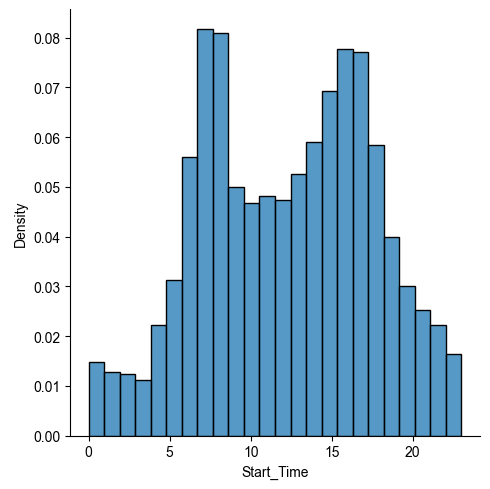

In [59]:
sns.displot(df.Start_Time.dt.hour, bins=24, kde=False, stat='density')

# Adding additional plot customizations
sns.set_style('whitegrid')  # Example: settin

/Users/yuniktamrakar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


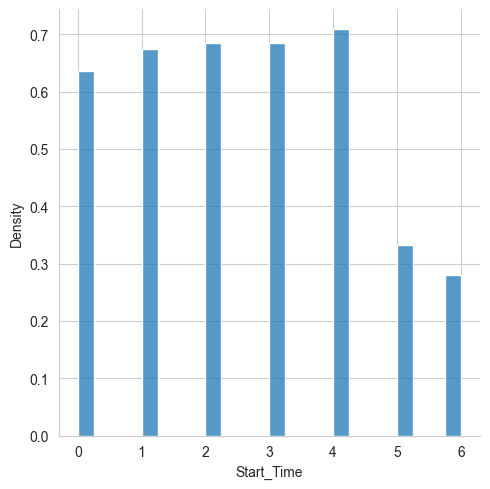

In [60]:
sns.displot(df.Start_Time.dt.dayofweek, bins=24, kde=False, stat='density')

/Users/yuniktamrakar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


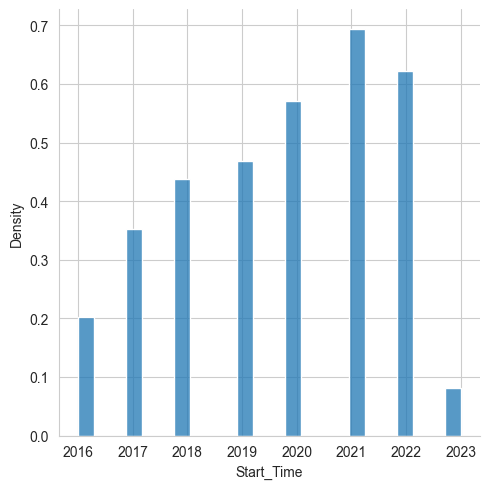

In [61]:
sns.displot(df.Start_Time.dt.year, bins=24, kde=False, stat='density')

# Adding additional plot customizations
sns.set_style('whitegrid')  # Example: settin

In [72]:
# Filter the DataFrame for rows where the year is 2023
df_2021 = df[df.Start_Time.dt.year == 2021]

# df_2016 now contains only the rows from the year 2023


In [73]:
df_2021.shape[0]

1412433

In [41]:
'''file_path = "datasets/US_Accidents_March23.csv"
num_rows = sum(1 for row in open(file_path, 'r', encoding='utf-8')) - 1
sample_size = 20000
skip_rows = sorted(random.sample(range(1, num_rows + 1), num_rows - sample_size)) 


df = pd.read_csv(file_path, skiprows=skip_rows)

df.head()'''

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-361,Source3,3,2016-02-24 06:53:32,2016-02-24 07:23:32,39.788414,-84.183693,NaN,NaN,0.94,...,False,False,False,False,False,False,Night,Day,Day,Day
1,A-397,Source2,2,2016-02-25 16:17:05,2016-02-25 17:02:05,39.819839,-84.189087,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-671,Source2,3,2016-03-16 05:01:05,2016-03-16 05:31:05,39.788414,-84.183693,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-701,Source2,2,2016-03-17 09:08:21,2016-03-17 09:38:21,39.625694,-84.200005,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-1112,Source2,2,2016-06-24 10:50:32,2016-06-24 11:20:32,38.550610,-121.422722,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [54]:
# First, filter out any rows where 'Start_Lat' or 'Start_Lng' is NaN
df_loc = df.loc[(~df['Start_Lat'].isna()) & (~df['Start_Lng'].isna())]

# Then, filter for rows where 'City' is 'Fort Collins' and 'State' is 'CO'
df_fort_collins = df_loc[(df_loc['City'] == 'Fort Collins') & (df_loc['State'] == 'CO')]

# Select only the 'Start_Lat' and 'Start_Lng' columns
df_fort_collins_coords = df_fort_collins[['Start_Lat', 'Start_Lng']]

# Display or use the DataFrame as needed
print(df_fort_collins_coords.head())  # Displaying the first few rows to verify

        Start_Lat   Start_Lng
524173  40.532181 -104.993530
524373  40.479637 -104.991844
533093  40.479637 -104.991844
537873  40.523327 -104.992561
542732  40.552681 -105.090210


In [55]:
def create_map(df_loc, latitude, longitude, zoom, tiles='OpenStreetMap'):
    """
    Generate a Folium Map with clustered markers of accident locations.
    """
    world_map = folium.Map(location=[latitude, longitude], zoom_start=zoom, tiles=tiles)
    marker_cluster = MarkerCluster().add_to(world_map)

    # Iterate over the DataFrame rows and add each marker to the cluster
    for idx, row in df_loc.iterrows():
        folium.Marker(
            location=[row['Start_Lat'], row['Start_Lng']],
            # You can add more attributes to your marker here, such as a popup
            popup=f"Lat, Lng: {row['Start_Lat']}, {row['Start_Lng']}"
        ).add_to(marker_cluster)

    return world_map

In [58]:
map_us = create_map(df_fort_collins_coords, 40.58, 105.0844, 4) #tiles="Cartodbdark_matter")
map_us


In [74]:
df_loc = df_2021.loc[(~df_2021.Start_Lat.isna()) & (~df_2021.Start_Lng.isna())]

In [23]:
df_loc[['Start_Lat', 'Start_Lng']].describe()

,Start_Lat,Start_Lng
count,20000.000000,20000.000000
mean,36.177636,-94.851819
std,5.061204,17.456781
min,24.575999,-124.420710
25%,33.385700,-117.278825
50%,35.825415,-87.800657
75%,40.055512,-80.384344
max,48.933872,-68.160789


In [75]:
def create_map(df_loc, latitude, longitude, zoom, tiles='OpenStreetMap'):
    """
    Generate a Folium Map with clustered markers of accident locations.
    """
    world_map = folium.Map(location=[latitude, longitude], zoom_start=zoom, tiles=tiles)
    marker_cluster = MarkerCluster().add_to(world_map)

    # Iterate over the DataFrame rows and add each marker to the cluster
    for idx, row in df_loc.iterrows():
        folium.Marker(
            location=[row['Start_Lat'], row['Start_Lng']],
            # You can add more attributes to your marker here, such as a popup
            popup=f"Lat, Lng: {row['Start_Lat']}, {row['Start_Lng']}"
        ).add_to(marker_cluster)

    return world_map

### Folium doesn't work with 20k+ data points. Let's use KeplerGL

In [27]:
!pip install keplergl
!jupyter nbextension install --py --sys-prefix keplergl
!jupyter nbextension enable --py --sys-prefix keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 1.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 1.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 953.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:0000:0100:01
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=1792

In [79]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
Building jupyterlab assets (production, minimized)


In [2]:
!jupyter labextension install keplergl-jupyter

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
/Users/yuniktamrakar/.pyenv/versions/3.10.3/lib/python3.10/site-packages/jupyterlab/debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
/Users/yuniktamrakar/.pyenv/versions/3.10.3/lib/python3.10/site-packages/jupyterlab/debuglog.py:57: UserWarning: ValueError: The extension "keplergl-jupyter" does not yet support the current version of JupyterLab.


Conflicting Dependencies:
JupyterLabExtension        Package
>=18.2.0 <19.0.0>=17.0.2 <18.0.0 react
>=18.2.0 <19.0.0>=17.0.2 <18.0.0 react-dom
  warnings.warn(msg[-1].strip())
/Users/yuniktamrakar/.pyenv/versions/3.10.3/lib/python3.10/site-packages/jupyterlab/debuglog.py:58: UserW

In [7]:
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [18]:
# Coordinates of the US cities
us_cities_coords = {
    "New York": {"lat": 40.7128, "lon": -74.0060},
    "Los Angeles": {"lat": 34.0522, "lon": -118.2437},
    "Chicago": {"lat": 41.8781, "lon": -87.6298},
    "Houston": {"lat": 29.7604, "lon": -95.3698},
    "Phoenix": {"lat": 33.4484, "lon": -112.0740},
    "Philadelphia": {"lat": 39.9526, "lon": -75.1652},
    "San Antonio": {"lat": 29.4241, "lon": -98.4936},
    "San Diego": {"lat": 32.7157, "lon": -117.1611},
    "Dallas": {"lat": 32.7767, "lon": -96.7970},
    "San Jose": {"lat": 37.3382, "lon": -121.8863},
    "Austin": {"lat": 30.2672, "lon": -97.7431},
    "Jacksonville": {"lat": 30.3322, "lon": -81.6557},
    "Fort Worth": {"lat": 32.7555, "lon": -97.3308},
    "Columbus": {"lat": 39.9612, "lon": -82.9988},
    "San Francisco": {"lat": 37.7749, "lon": -122.4194},
    "Charlotte": {"lat": 35.2271, "lon": -80.8431},
    "Indianapolis": {"lat": 39.7684, "lon": -86.1581},
    "Seattle": {"lat": 47.6062, "lon": -122.3321},
    "Denver": {"lat": 39.7392, "lon": -104.9903},
    "Washington": {"lat": 38.9072, "lon": -77.0369}
}

In [ ]:
map_ny = create_map(
    df_loc, us_cities_coords['New York']['lat'],
    us_cities_coords['New York']['lon'],
    10, tiles="cartodbpositron")
map_ny

In [ ]:
map_ls = create_map(df_loc, 
                    us_cities_coords['Los Angeles']['lat'],
                    us_cities_coords['Los Angeles']['lon'], 
                    10,
                    tiles="Cartodbdark_matter"
                   )
map_ls

In [ ]:
from folium.plugins import HeatMap

def create_heatmap(df_loc, latitude, longitude, zoom, tiles='OpenStreetMap'):
    """
    Generate a Folium Map with a heatmap of accident locations.
    """
    # Create a list of coordinates from the dataframe columns 'Start_Lat' and 'Start_Lng'
    heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df_loc.iterrows()]

    # Create a map centered around the specified coordinates
    world_map = folium.Map(location=[latitude, longitude], zoom_start=zoom, tiles=tiles)

    # Add the heatmap layer to the map
    HeatMap(heat_data).add_to(world_map)

    return world_map


# Create a heatmap for the entire US using the create_heatmap function
map_us_heatmap = create_heatmap(df_loc.sample(3000), us_cities_coords['Los Angeles']['lat'],
                                us_cities_coords['Los Angeles']['lon']
                                ,  10)

map_us_heatmap

In [ ]:
def create_accident_map(df_loc):
    """Generate a map with CircleMarkers for accident locations."""
    m = folium.Map(location=[39.8283, -98.5795], width="100%", height="100%", zoom_start=4)
    
    for index, row in df_loc.iterrows():
        lat = row['Start_Lat']
        lon = row['Start_Lng']
        
        if not pd.isnull(lat) and not pd.isnull(lon):
            folium.CircleMarker(
                location=[lat, lon],
                radius=1,
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
            ).add_to(m)

    return m

create_accident_map(df_loc)

In [ ]:
import folium
import pandas as pd

def create_accident_map_with_colors(df_loc):
    """Generate a map with CircleMarkers for accident locations, colored by severity."""
    m = folium.Map(location=[39.8283, -98.5795], width="100%", height="100%", zoom_start=4)
    
    # color scheme for different severity levels 
    severity_colors = {
        1: 'purple',
        2: 'green',
        3: 'orange',
        4: 'red',
    }
    
    for index, row in df_loc.iterrows():
        lat = row['Start_Lat']
        lon = row['Start_Lng']
        severity = row['Severity']
        
        if not pd.isnull(lat) and not pd.isnull(lon) and severity in severity_colors:
            # Get color based on severity
            color = severity_colors[severity]
            
            folium.CircleMarker(
                location=[lat, lon],
                radius=1,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.6
            ).add_to(m)
    return m

create_accident_map_with_colors(df_loc)